In [138]:
# IMPORTATION OF RELEVANT LIBRARY
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [139]:
# SCRAPPING OF NBA BASKET BALL DATA USING PYTHON BEAUTIFUL SOUP
url = "https://www.basketball-reference.com/leagues/NBA_2024_per_game.html"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    print("Successfully fetched the webpage!")
else:
    print(f"Failed to fetch the webpage. Status code: {response.status_code}")
    exit()

# Step 2: Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Step 3: Scrape the NBA Data Table
table = soup.find("table", {"id": "per_game_stats"})  # Get the table with specific id
nba_data = pd.read_html(str(table))[0]  # Use pandas read_html to directly convert to DataFrame

# Step 4: Clean the Data
# Filter out rows where 'Player' column is equal to 'Player' (header row)
nba_data = nba_data[nba_data['Rk'] != 'Rk']

# Dynamically convert numeric columns to numeric (ignore conversion errors)
for col in nba_data.columns:
    nba_data[col] = pd.to_numeric(nba_data[col], errors='ignore')

Successfully fetched the webpage!


In [140]:
# VIEW THE FIRST 5 ROWS
nba_data.head()

Rk                   Player   Age Team Pos     G    GS    MP    FG   FGA  \
0  1.0              Joel Embiid  29.0  PHI   C  39.0  39.0  33.6  11.5  21.8   
1  2.0              Luka Dončić  24.0  DAL  PG  70.0  70.0  37.5  11.5  23.6   
2  3.0    Giannis Antetokounmpo  29.0  MIL  PF  73.0  73.0  35.2  11.5  18.8   
3  4.0  Shai Gilgeous-Alexander  25.0  OKC  PG  75.0  75.0  34.0  10.6  19.8   
4  5.0            Jalen Brunson  27.0  NYK  PG  77.0  77.0  35.4  10.3  21.4   

   ...  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  \
0  ...  2.4  8.6  11.0  5.6  1.2  1.7  3.8  2.9  34.7   
1  ...  0.8  8.4   9.2  9.8  1.4  0.5  4.0  2.1  33.9   
2  ...  2.7  8.8  11.5  6.5  1.2  1.1  3.4  2.9  30.4   
3  ...  0.9  4.7   5.5  6.2  2.0  0.9  2.2  2.5  30.1   
4  ...  0.6  3.1   3.6  6.7  0.9  0.2  2.4  1.9  28.7   

                         Awards  
0                            AS  
1          MVP-3,CPOY-6,AS,NBA1  
2  MVP-4,DPOY-9,CPOY-12,AS,NBA1  
3   MVP-2,DPOY-7,CPOY-3,AS,NBA1  
4          MVP-5,CPOY-5,AS,NBA2  

[5 rows x 31 columns]

In [181]:
# SAVE DATA TO CSV FOR USE IN MATLAB
nba_data.to_csv("nba_data.csv")

In [141]:
# VIEW DATA SHAPE (TOTAL NUMBER OF ROWS AND COLUMNS)
nba_data.shape

(736, 31)

As seen above, the data has 736 rows and 31 columns

In [142]:
# DISPLAY THE COLUMN NAMES
nba_data.columns

Index(['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Awards'],
      dtype='object')

The column names are abbreviated hence I went ahead to do more research and provide details on the meaning of the names. I have provided this information as another data frame as given below

In [143]:
data = [
    ("Rk", "Rank: The rank of the player in the list of NBA players."),
    ("Player", "Player: The name of the player."),
    ("Pos", "Position: The player's position (e.g., PG, SG, SF, PF, C)."),
    ("Age", "Age: The player's age."),
    ("Tm", "Team: The team the player belongs to (e.g., LAL for Los Angeles Lakers)."),
    ("G", "Games: The number of games the player has played in the season."),
    ("GS", "Games Started: The number of games the player has started."),
    ("MP", "Minutes Played: Average minutes played per game."),
    ("FG", "Field Goals Made: The total number of field goals made by the player."),
    ("FGA", "Field Goals Attempted: The total number of field goals attempted by the player."),
    ("FG%", "Field Goal Percentage: The percentage of successful field goals out of total attempts."),
    ("3P", "Three-Point Field Goals Made: The total number of three-point shots made."),
    ("3PA", "Three-Point Field Goals Attempted: The total number of three-point shots attempted."),
    ("3P%", "Three-Point Percentage: The percentage of successful three-point shots out of total attempts."),
    ("2P", "Two-Point Field Goals Made: The total number of two-point shots made."),
    ("2PA", "Two-Point Field Goals Attempted: The total number of two-point shots attempted."),
    ("2P%", "Two-Point Percentage: The percentage of successful two-point shots out of total attempts."),
    ("FT", "Free Throws Made: The total number of free throws made."),
    ("FTA", "Free Throws Attempted: The total number of free throws attempted."),
    ("FT%", "Free Throw Percentage: The percentage of successful free throws out of total attempts."),
    ("ORB", "Offensive Rebounds: The total number of offensive rebounds."),
    ("DRB", "Defensive Rebounds: The total number of defensive rebounds."),
    ("TRB", "Total Rebounds: The total number of rebounds (ORB + DRB)."),
    ("AST", "Assists: The total number of assists."),
    ("STL", "Steals: The total number of steals."),
    ("BLK", "Blocks: The total number of blocks."),
    ("TOV", "Turnovers: The total number of turnovers."),
    ("PF", "Personal Fouls: The total number of personal fouls."),
    ("PTS", "Points: The total number of points scored."),
    ("+/-", "Plus/Minus: The point differential when the player is on the court.")
]

# Convert the list into a DataFrame
column_explanations = pd.DataFrame(data, columns=["Column", "Explanation"])

# Display the table
print(column_explanations)

    Column                                        Explanation
0       Rk  Rank: The rank of the player in the list of NB...
1   Player                    Player: The name of the player.
2      Pos  Position: The player's position (e.g., PG, SG,...
3      Age                             Age: The player's age.
4       Tm  Team: The team the player belongs to (e.g., LA...
5        G  Games: The number of games the player has play...
6       GS  Games Started: The number of games the player ...
7       MP   Minutes Played: Average minutes played per game.
8       FG  Field Goals Made: The total number of field go...
9      FGA  Field Goals Attempted: The total number of fie...
10     FG%  Field Goal Percentage: The percentage of succe...
11      3P  Three-Point Field Goals Made: The total number...
12     3PA  Three-Point Field Goals Attempted: The total n...
13     3P%  Three-Point Percentage: The percentage of succ...
14      2P  Two-Point Field Goals Made: The total number o...
15     2

In [144]:
# CHECKING DATA TYPE OF THE COLUMNS
nba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      735 non-null    float64
 1   Player  736 non-null    object 
 2   Age     735 non-null    float64
 3   Team    735 non-null    object 
 4   Pos     735 non-null    object 
 5   G       735 non-null    float64
 6   GS      735 non-null    float64
 7   MP      735 non-null    float64
 8   FG      735 non-null    float64
 9   FGA     735 non-null    float64
 10  FG%     728 non-null    float64
 11  3P      735 non-null    float64
 12  3PA     735 non-null    float64
 13  3P%     690 non-null    float64
 14  2P      735 non-null    float64
 15  2PA     735 non-null    float64
 16  2P%     723 non-null    float64
 17  eFG%    728 non-null    float64
 18  FT      735 non-null    float64
 19  FTA     735 non-null    float64
 20  FT%     677 non-null    float64
 21  ORB     735 non-null    float64
 22  DR

In [145]:
# CHECKING FOR MISSING VALUES
nba_data.isnull().sum()

Rk          1
Player      0
Age         1
Team        1
Pos         1
G           1
GS          1
MP          1
FG          1
FGA         1
FG%         8
3P          1
3PA         1
3P%        46
2P          1
2PA         1
2P%        13
eFG%        8
FT          1
FTA         1
FT%        59
ORB         1
DRB         1
TRB         1
AST         1
STL         1
BLK         1
TOV         1
PF          1
PTS         1
Awards    681
dtype: int64

In [146]:
# MISSING VALUES IN PASSENTAGE
nba_data.isnull().sum()/len(nba_data)*100

Rk         0.135870
Player     0.000000
Age        0.135870
Team       0.135870
Pos        0.135870
G          0.135870
GS         0.135870
MP         0.135870
FG         0.135870
FGA        0.135870
FG%        1.086957
3P         0.135870
3PA        0.135870
3P%        6.250000
2P         0.135870
2PA        0.135870
2P%        1.766304
eFG%       1.086957
FT         0.135870
FTA        0.135870
FT%        8.016304
ORB        0.135870
DRB        0.135870
TRB        0.135870
AST        0.135870
STL        0.135870
BLK        0.135870
TOV        0.135870
PF         0.135870
PTS        0.135870
Awards    92.527174
dtype: float64

In [147]:
# 92% of award column are missing values hence I will drop the award column and replace missing values in other column with column mean
nba_data = nba_data.drop("Awards", axis=1)

In [148]:
numeric_cols = nba_data.select_dtypes(include=['number']).columns  # Select numeric columns
nba_data[numeric_cols] = nba_data[numeric_cols].fillna(nba_data[numeric_cols].mean())

In [149]:
nba_data.isnull().sum()

Rk        0
Player    0
Age       0
Team      1
Pos       1
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [150]:
nba_data.shape

(736, 30)

In [151]:
nba_data["Team"].unique()

array(['PHI', 'DAL', 'MIL', 'OKC', 'NYK', 'PHO', 'BOS', 'SAC', 'CLE',
       'GSW', 'DEN', 'MIN', 'LAL', 'ATL', 'MEM', 'CHI', 'CHO', 'LAC',
       'UTA', 'NOP', 'DET', 'ORL', 'POR', 'BRK', 'WAS', '2TM', 'TOR',
       'IND', 'SAS', 'HOU', 'MIA', '3TM', nan], dtype=object)

In [152]:
# I will remove the row with missing value in the Team column
nba_data = nba_data.dropna()

In [153]:
nba_data.shape

(735, 30)

In [154]:
# No more missing values
nba_data.isnull().sum()

Rk        0
Player    0
Age       0
Team      0
Pos       0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

As seen above, out of the 31 columns, 3 have object data type while 28 have float data type

In [155]:
# GENERATING THE DESCRIPTIVE STATISTICS FOR THE NUMERICAL COLUMNS
nba_data.describe().transpose()

count        mean         std   min       25%         50%       75%  \
Rk    735.0  290.189116  157.095342   1.0  162.5000  293.000000  423.0000   
Age   735.0   26.155102    4.371745  19.0   23.0000   25.000000   29.0000   
G     735.0   40.880272   25.581293   1.0   17.0000   41.000000   64.5000   
GS    735.0   18.440816   25.024108   0.0    0.0000    5.000000   29.0000   
MP    735.0   18.264762    9.735524   0.5   10.6000   17.200000   26.4500   
FG    735.0    2.972789    2.356999   0.0    1.3000    2.300000    4.1500   
FGA   735.0    6.423401    4.783384   0.0    3.0000    5.000000    8.7000   
FG%   735.0    0.447559    0.110096   0.0    0.4020    0.447595    0.5000   
3P    735.0    0.909116    0.848969   0.0    0.2000    0.700000    1.4000   
3PA   735.0    2.582449    2.166629   0.0    0.9000    2.100000    3.7000   
3P%   735.0    0.316929    0.132848   0.0    0.2860    0.336000    0.3835   
2P    735.0    2.062721    1.873121   0.0    0.7000    1.500000    2.9000   
2PA   735.0    3.840408    3.340812   0.0    1.5000    2.800000    5.2500   
2P%   735.0    0.519686    0.135596   0.0    0.4795    0.528000    0.5795   
eFG%  735.0    0.515692    0.114110   0.0    0.4835    0.529000    0.5750   
FT    735.0    1.170884    1.299600   0.0    0.3000    0.800000    1.5000   
FTA   735.0    1.509252    1.585758   0.0    0.5000    1.000000    2.0000   
FT%   735.0    0.749674    0.153464   0.0    0.6980    0.760000    0.8330   
ORB   735.0    0.822041    0.732770   0.0    0.3000    0.600000    1.1000   
DRB   735.0    2.423265    1.741203   0.0    1.1000    2.100000    3.3500   
TRB   735.0    3.239184    2.320766   0.0    1.6000    2.800000    4.3000   
AST   735.0    1.934150    1.800255   0.0    0.7000    1.300000    2.6000   
STL   735.0    0.587347    0.393774   0.0    0.3000    0.500000    0.8000   
BLK   735.0    0.383946    0.400733   0.0    0.1000    0.300000    0.5000   
TOV   735.0    0.943946    0.758414   0.0    0.4000    0.700000    1.3000   
PF    735.0    1.456735    0.784284   0.0    0.9000    1.400000    2.0000   
PTS   735.0    8.022313    6.481825   0.0    3.4000    6.100000   11.0500   

          max  
Rk    572.000  
Age    39.000  
G      84.000  
GS     82.000  
MP     37.800  
FG     11.500  
FGA    23.600  
FG%     0.800  
3P      4.800  
3PA    11.800  
3P%     1.000  
2P     11.000  
2PA    18.300  
2P%     1.000  
eFG%    0.917  
FT     10.200  
FTA    11.600  
FT%     1.000  
ORB     4.600  
DRB    10.100  
TRB    13.700  
AST    10.900  
STL     2.100  
BLK     3.600  
TOV     4.400  
PF      3.600  
PTS    34.700

In [156]:
# HOW NUMBER OF GAMES CHANGE WITH AGE
nba_data.groupby('Age')['G'].sum()

Age
19.0     421.0
20.0    1361.0
21.0    2015.0
22.0    2023.0
23.0    2828.0
24.0    3069.0
25.0    3296.0
26.0    2255.0
27.0    2028.0
28.0    1858.0
29.0    1627.0
30.0    1433.0
31.0    1661.0
32.0     952.0
33.0     903.0
34.0     513.0
35.0    1046.0
36.0     201.0
37.0     326.0
38.0     160.0
39.0      71.0
Name: G, dtype: float64

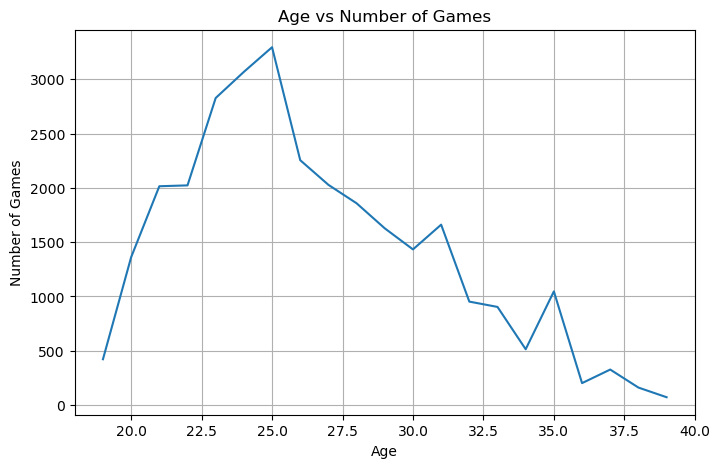

In [157]:
# Step 6: Plot: Points per Game Distribution
plt.figure(figsize=(8, 5))
plt.plot(nba_data.groupby('Age')['G'].sum())
plt.title("Age vs Number of Games")
plt.xlabel("Age")
plt.ylabel("Number of Games")
plt.grid(True)
plt.show()

In [158]:
# HOW MINUTES PLAYED CHANGE WITH AGE
nba_data.groupby('Age')['MP'].sum()

Age
19.0     209.7
20.0     527.1
21.0     689.0
22.0    1036.0
23.0    1217.4
24.0    1502.6
25.0    1447.0
26.0    1010.2
27.0     910.9
28.0     775.0
29.0     799.7
30.0     675.3
31.0     695.6
32.0     377.5
33.0     448.8
34.0     259.4
35.0     480.6
36.0      67.7
37.0     150.4
38.0     109.4
39.0      35.3
Name: MP, dtype: float64

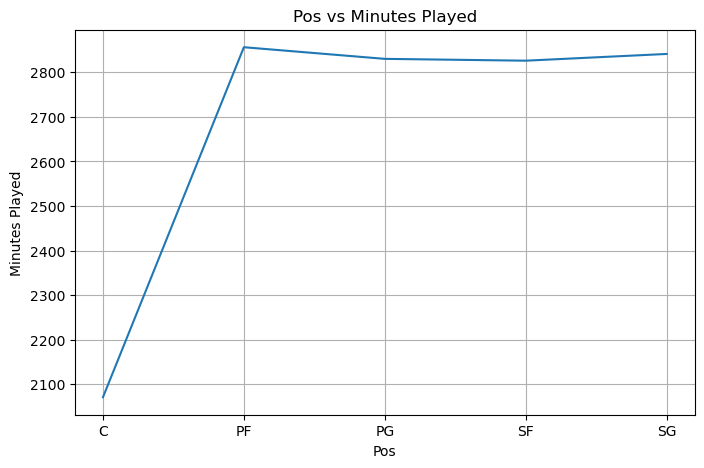

In [172]:
# Step 6: Plot: Points per Game Distribution
plt.figure(figsize=(8, 5))
plt.plot(nba_data.groupby('Pos')['MP'].sum())
plt.title("Pos vs Minutes Played")
plt.xlabel("Pos")
plt.ylabel("Minutes Played")
plt.grid(True)
plt.show()

In [160]:
nba_data.columns

Index(['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [161]:
# GROUPING BY TEAM COLUMN AND SELECTING A SUBSET OF THE COLUMNS
nba_data.groupby('Team')[['Rk','Age','G','GS','MP','FG','FGA',
       'FG%','3P','3PA','3P%','2P','2PA']].mean()

Rk        Age          G         GS         MP        FG  \
Team                                                                     
2TM   290.859155  27.690141  47.352113  17.577465  18.474648  2.690141   
3TM   386.142857  27.000000  40.714286   0.857143  10.628571  1.457143   
ATL   274.736842  25.789474  42.052632  21.578947  20.389474  3.326316   
BOS   262.526316  26.000000  45.052632  21.578947  17.947368  3.126316   
BRK   262.333333  25.142857  40.047619  19.523810  19.785714  3.061905   
CHI   279.333333  26.166667  46.277778  22.777778  19.988889  3.355556   
CHO   286.615385  25.115385  32.192308  15.769231  21.480769  3.469231   
CLE   274.388889  26.166667  46.055556  22.777778  19.566667  3.316667   
DAL   284.181818  26.045455  42.272727  18.636364  18.209091  3.177273   
DEN   311.176471  26.352941  54.294118  24.117647  17.100000  3.076471   
DET   281.322581  25.838710  27.903226  13.225806  19.377419  3.054839   
GSW   287.555556  27.166667  51.055556  22.777778  17.777778  3.055556   
HOU   272.823529  25.941176  51.941176  24.117647  18.770588  3.282353   
IND   270.727273  25.681818  41.227273  18.636364  16.877273  3.181818   
LAC   303.714286  28.619048  40.952381  19.523810  18.280952  2.833333   
LAL   320.047619  25.619048  41.333333  19.523810  16.666667  2.671429   
MEM   269.333333  25.090909  24.787879  12.424242  21.757576  3.230303   
MIA   271.285714  27.428571  39.380952  19.523810  20.252381  3.190476   
MIL   319.380952  28.333333  43.238095  19.523810  15.819048  2.638095   
MIN   321.000000  25.894737  46.947368  21.578947  16.289474  2.752632   
NOP   308.800000  25.300000  43.400000  20.500000  17.110000  2.870000   
NYK   297.423077  26.884615  31.923077  15.769231  16.665385  2.707692   
OKC   290.363636  25.000000  44.545455  18.636364  15.168182  2.531818   
ORL   299.444444  24.555556  53.333333  22.777778  17.550000  2.844444   
PHI   317.750000  27.857143  32.500000  14.642857  16.817857  2.610714   
PHO   303.318182  27.727273  40.636364  18.636364  16.609091  2.731818   
POR   278.272727  24.272727  37.954545  18.636364  20.790909  3.327273   
SAC   338.050000  26.250000  47.650000  20.500000  15.520000  2.650000   
SAS   276.900000  23.600000  45.100000  20.500000  18.130000  3.120000   
TOR   284.700000  26.000000  28.533333  13.666667  19.136667  3.110000   
UTA   253.523810  24.333333  42.428571  19.523810  20.371429  3.404762   
WAS   280.541667  25.250000  38.583333  17.083333  17.045833  2.945833   

           FGA       FG%        3P       3PA       3P%        2P       2PA  
Team                                                                        
2TM   5.947887  0.452789  0.859155  2.502817  0.320563  1.828169  3.447887  
3TM   3.485714  0.421571  0.500000  1.614286  0.303000  0.957143  1.857143  
ATL   7.326316  0.436053  1.136842  3.157895  0.305105  2.184211  4.178947  
BOS   6.363158  0.490947  1.131579  2.926316  0.387158  1.989474  3.442105  
BRK   6.852381  0.427810  1.009524  2.900000  0.301762  2.047619  3.957143  
CHI   7.161111  0.439278  0.944444  2.694444  0.296889  2.416667  4.461111  
CHO   7.626923  0.443538  1.046154  3.023077  0.310384  2.419231  4.600000  
CLE   7.011111  0.458944  1.066667  2.938889  0.329667  2.233333  4.072222  
DAL   6.531818  0.489409  0.986364  2.745455  0.317818  2.209091  3.781818  
DEN   6.235294  0.478529  0.835294  2.264706  0.351117  2.229412  3.982353  
DET   6.738710  0.447310  0.961290  2.774194  0.316419  2.087097  3.980645  
GSW   6.466667  0.461722  1.022222  2.755556  0.271500  2.022222  3.683333  
HOU   7.035294  0.479588  0.935294  2.635294  0.303824  2.341176  4.400000  
IND   6.518182  0.448591  0.854545  2.418182  0.280909  2.327273  4.113636  
LAC   6.009524  0.452905  0.833333  2.404762  0.298095  1.990476  3.604762  
LAL   5.614286  0.419143  0.747619  2.133333  0.275381  1.933333  3.476190  
MEM   7.624242  0.410818  0.945455  2.981818  0.292969  2.275758  4.642424  
MIA   7.052381  0.433619  1.071429

In [162]:
# CORRELATION OF A SUBSET OF THE COLUMNS
nba_data[['Rk','Age','G','GS','MP','FG','FGA',
       'FG%','3P','3PA','3P%','2P','2PA']].corr()

Rk       Age         G        GS        MP        FG       FGA  \
Rk   1.000000 -0.089236 -0.654016 -0.751974 -0.907913 -0.908744 -0.904956   
Age -0.089236  1.000000  0.082762  0.070683  0.145436  0.069190  0.070429   
G   -0.654016  0.082762  1.000000  0.669234  0.647642  0.576278  0.557685   
GS  -0.751974  0.070683  0.669234  1.000000  0.804975  0.792599  0.771083   
MP  -0.907913  0.145436  0.647642  0.804975  1.000000  0.889265  0.894982   
FG  -0.908744  0.069190  0.576278  0.792599  0.889265  1.000000  0.978061   
FGA -0.904956  0.070429  0.557685  0.771083  0.894982  0.978061  1.000000   
FG% -0.310400  0.011405  0.303780  0.243300  0.264743  0.326115  0.183509   
3P  -0.726991  0.151919  0.500696  0.582774  0.724300  0.692578  0.772895   
3PA -0.724643  0.125395  0.474267  0.571439  0.731173  0.691093  0.791656   
3P% -0.270792  0.079346  0.226846  0.164068  0.242069  0.217568  0.213548   
2P  -0.814685  0.018160  0.497425  0.732726  0.790680  0.944863  0.880964   
2PA -0.825969  0.019243  0.491197  0.732907  0.807079  0.952250  0.918338   

          FG%        3P       3PA       3P%        2P       2PA  
Rk  -0.310400 -0.726991 -0.724643 -0.270792 -0.814685 -0.825969  
Age  0.011405  0.151919  0.125395  0.079346  0.018160  0.019243  
G    0.303780  0.500696  0.474267  0.226846  0.497425  0.491197  
GS   0.243300  0.582774  0.571439  0.164068  0.732726  0.732907  
MP   0.264743  0.724300  0.731173  0.242069  0.790680  0.807079  
FG   0.326115  0.692578  0.691093  0.217568  0.944863  0.952250  
FGA  0.183509  0.772895  0.791656  0.213548  0.880964  0.918338  
FG%  1.000000  0.000473 -0.080108  0.199834  0.409600  0.314994  
3P   0.000473  1.000000  0.979770  0.407994  0.418926  0.471509  
3PA -0.080108  0.979770  1.000000  0.311436  0.425968  0.485350  
3P%  0.199834  0.407994  0.311436  1.000000  0.087697  0.103209  
2P   0.409600  0.418926  0.425968  0.087697  1.000000  0.985063  
2PA  0.314994  0.471509  0.485350  0.103209  0.985063  1.000000

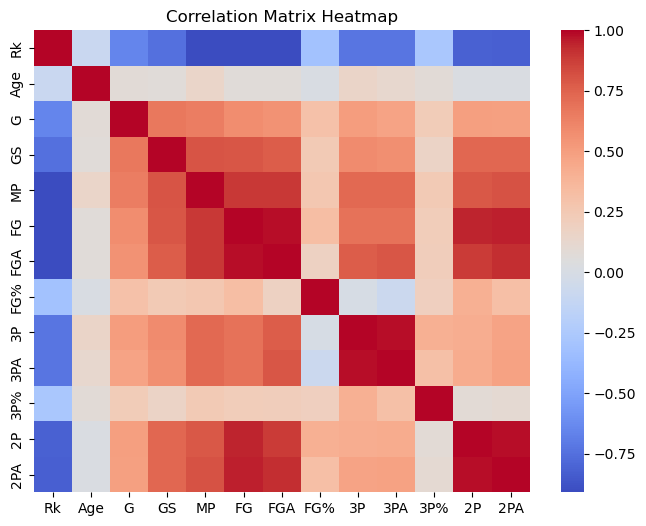

In [163]:
# HEATMAP FOR VISUALIZING THE CORRELATION OF A SUBSET OF THE COLUMNS
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(nba_data[['Rk','Age','G','GS','MP','FG','FGA',
       'FG%','3P','3PA','3P%','2P','2PA']].corr(), cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [164]:
# GROUPING THE REMAINING COLUMNS BY TEAM
nba_data.groupby('Team')[['2P%','eFG%','FT','FTA',
       'FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']].mean()

2P%      eFG%        FT       FTA       FT%       ORB       DRB  \
Team                                                                         
2TM   0.515225  0.521648  0.978873  1.284507  0.771095  0.792958  2.260563   
3TM   0.529143  0.505000  0.714286  0.914286  0.762674  0.400000  1.228571   
ATL   0.510053  0.519895  1.384211  1.747368  0.779655  1.021053  2.642105   
BOS   0.595316  0.577474  1.147368  1.442105  0.767038  0.889474  2.652632   
BRK   0.513987  0.490048  1.209524  1.619048  0.715511  0.933333  2.657143   
CHI   0.511778  0.502722  1.283333  1.638889  0.732707  1.000000  2.722222   
CHO   0.490769  0.506577  1.342308  1.684615  0.777385  0.869231  2.673077   
CLE   0.510778  0.531944  1.183333  1.588889  0.636040  0.794444  2.611111   
DAL   0.560591  0.554409  1.150000  1.577273  0.690805  0.836364  2.540909   
DEN   0.575824  0.553294  1.041176  1.394118  0.751337  0.764706  2.394118   
DET   0.498830  0.523669  1.261290  1.593548  0.753305  0.774194  2.525806   
GSW   0.556778  0.524667  1.077778  1.400000  0.727984  0.905556  2.527778   
HOU   0.532176  0.543118  1.352941  1.782353  0.776412  1.000000  2.800000   
IND   0.537091  0.502500  1.090909  1.390909  0.787838  0.700000  2.136364   
LAC   0.577095  0.515810  1.152381  1.447619  0.747259  0.823810  2.342857   
LAL   0.478143  0.480667  1.161905  1.504762  0.745246  0.571429  2.176190   
MEM   0.469061  0.469545  1.200000  1.651515  0.685641  1.072727  2.836364   
MIA   0.531286  0.510000  1.352381  1.638095  0.833000  0.742857  2.552381   
MIL   0.516082  0.536083  1.123810  1.438095  0.766579  0.580952  2.200000   
MIN   0.550933  0.548933  1.142105  1.478947  0.745286  0.647368  2.278947   
NOP   0.476100  0.448650  1.180000  1.515000  0.789308  0.725000  2.335000   
NYK   0.484545  0.453923  1.150000  1.480769  0.759716  0.826923  2.142308   
OKC   0.500636  0.527091  1.013636  1.263636  0.739066  0.550000  2.027273   
ORL   0.558278  0.541667  1.211111  1.611111  0.683818  0.766667  2.288889   
PHI   0.473684  0.497052  1.207143  1.446429  0.775823  0.664286  2.214286   
PHO   0.509000  0.512818  1.177273  1.459091  0.757384  0.763636  2.295455   
POR   0.471136  0.488773  1.336364  1.713636  0.736124  1.090909  2.636364   
SAC   0.527800  0.541500  0.935000  1.285000  0.709022  0.710000  2.105000   
SAS   0.584200  0.577750  1.115000  1.430000  0.771122  0.830000  2.600000   
TOR   0.507781  0.489149  1.243333  1.646667  0.734039  0.980000  2.490000   
UTA   0.558190  0.540619  1.457143  1.761905  0.789225  1.100000  2.776190   
WAS   0.539405  0.527197  1.137500  1.479167  0.754102  0.866667  2.404167   

           TRB       AST       STL       BLK       TOV        PF       PTS  
Team                                                                        
2TM   3.039437  1.832394  0.608451  0.364789  0.876056  1.461972  7.232394  
3TM   1.642857  1.214286  0.314286  0.114286  0.528571  0.871429  4.142857  
ATL   3.647368  2.110526  0.631579  0.384211  1.015789  1.663158  9.205263  
BOS   3.521053  1.889474  0.573684  0.505263  0.826316  1.305263  8.526316  
BRK   3.576190  2.252381  0.595238  0.414286  1.000000  1.490476  8.295238  
CHI   3.705556  1.827778  0.650000  0.416667  0.944444  1.605556  8.961111  
CHO   3.530769  2.446154  0.661538  0.400000  1.184615  1.603846  9.300000  
CLE   3.400000  2.255556  0.572222  0.361111  1.055556  1.433333  8.888889  
DAL   3.377273  1.781818  0.550000  0.450000  0.904545  1.404545  8.472727  
DEN   3.152941  2.082353  0.517647  0.405882  0.841176  1.382353  8.041176  
DET   3.280645  1.738710  0.535484  0.367742  0.967742  1.519355  8.329032  
GSW   3.450000  2.194444  0.511111  0.366667  0.994444  1.483333  8.200000  
HOU   3.800000  1.835294  0.641176  0.370588  0.935294  1.652941  8.829412  
IND   2.836364  2.004545  0.554545  0.345455  0.800000  1.518182  8.322727  
LAC   3.142857  1.809524  0.695238  0.461905  0.938095  1.490476  7.647619  
LAL   2.738095  1.814286  0.523810  0.338095  0.8

In [165]:
# CORRELATION OF THE REMAINING COLUMNS
nba_data[['2P%','eFG%','FT','FTA',
       'FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']].corr()

2P%      eFG%        FT       FTA       FT%       ORB       DRB  \
2P%   1.000000  0.648112  0.105833  0.129820 -0.053543  0.267764  0.253243   
eFG%  0.648112  1.000000  0.185794  0.202871  0.037353  0.297663  0.339613   
FT    0.105833  0.185794  1.000000  0.989088  0.244902  0.334197  0.662447   
FTA   0.129820  0.202871  0.989088  1.000000  0.161207  0.398356  0.700634   
FT%  -0.053543  0.037353  0.244902  0.161207  1.000000 -0.143058  0.043427   
ORB   0.267764  0.297663  0.334197  0.398356 -0.143058  1.000000  0.715146   
DRB   0.253243  0.339613  0.662447  0.700634  0.043427  0.715146  1.000000   
TRB   0.274114  0.348136  0.602359  0.651230 -0.011449  0.851152  0.975311   
AST   0.053311  0.151912  0.700023  0.685935  0.211421  0.153063  0.541409   
STL   0.138210  0.180751  0.523368  0.522190  0.166780  0.321470  0.540350   
BLK   0.288330  0.317142  0.362596  0.402952 -0.065388  0.661887  0.657370   
TOV   0.119008  0.187008  0.812517  0.816753  0.175246  0.350509  0.705972   
PF    0.255751  0.350031  0.533413  0.556232  0.075176  0.569047  0.714851   
PTS   0.167835  0.298293  0.903076  0.896672  0.237457  0.354786  0.746299   

           TRB       AST       STL       BLK       TOV        PF       PTS  
2P%   0.274114  0.053311  0.138210  0.288330  0.119008  0.255751  0.167835  
eFG%  0.348136  0.151912  0.180751  0.317142  0.187008  0.350031  0.298293  
FT    0.602359  0.700023  0.523368  0.362596  0.812517  0.533413  0.903076  
FTA   0.651230  0.685935  0.522190  0.402952  0.816753  0.556232  0.896672  
FT%  -0.011449  0.211421  0.166780 -0.065388  0.175246  0.075176  0.237457  
ORB   0.851152  0.153063  0.321470  0.661887  0.350509  0.569047  0.354786  
DRB   0.975311  0.541409  0.540350  0.657370  0.705972  0.714851  0.746299  
TRB   1.000000  0.454514  0.507438  0.701399  0.641068  0.716144  0.671586  
AST   0.454514  1.000000  0.634019  0.183548  0.831313  0.493617  0.773666  
STL   0.507438  0.634019  1.000000  0.360813  0.618915  0.607053  0.635108  
BLK   0.701399  0.183548  0.360813  1.000000  0.370895  0.558892  0.396393  
TOV   0.641068  0.831313  0.618915  0.370895  1.000000  0.655046  0.872209  
PF    0.716144  0.493617  0.607053  0.558892  0.655046  1.000000  0.639130  
PTS   0.671586  0.773666  0.635108  0.396393  0.872209  0.639130  1.000000

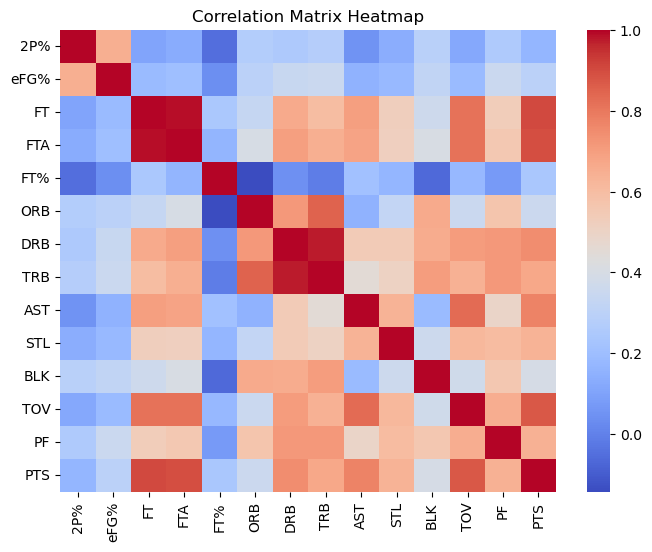

In [166]:
# VISUALIZING THE CORRELATION OF THE REMAINING COLUMNS
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(nba_data[['2P%','eFG%','FT','FTA',
       'FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']].corr(), cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

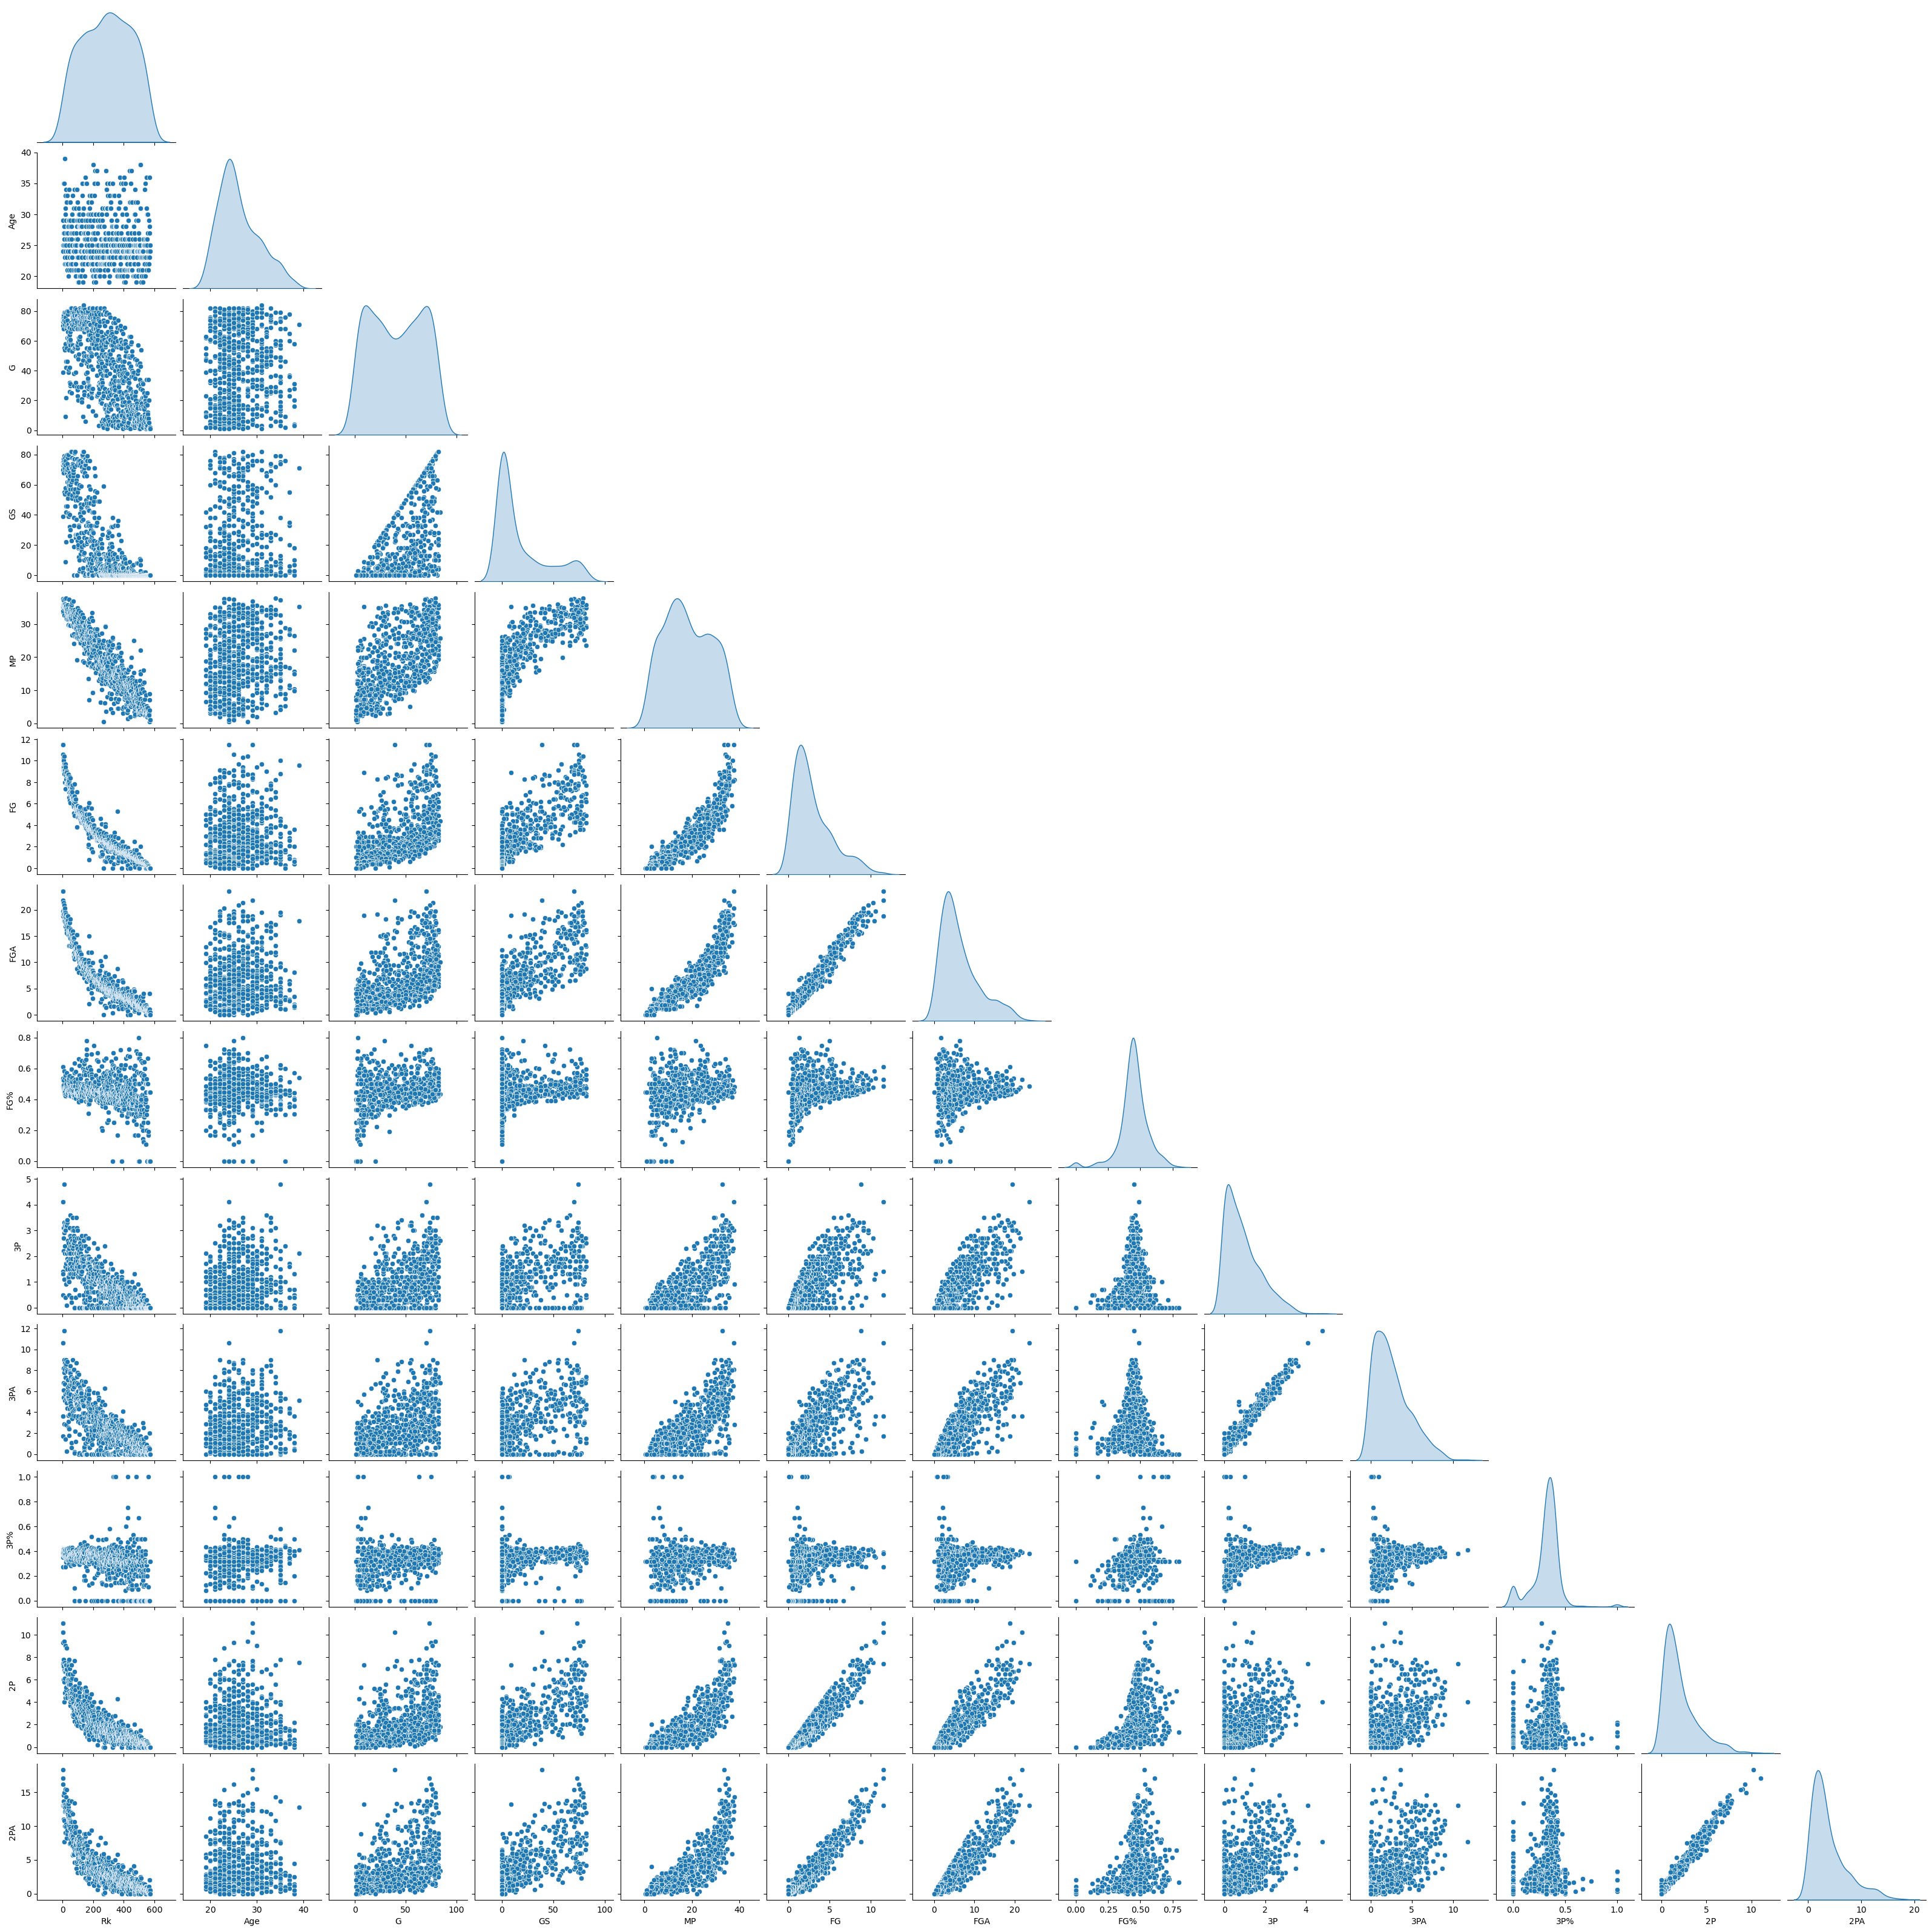

In [170]:
# VISUALING THE DISTRIBUTION OF THE SOME VARIABLES AND THEIR RELATIONSHIPS (CORRELATIONS)
sns.pairplot(nba_data[['Rk','Age','G','GS','MP','FG','FGA',
       'FG%','3P','3PA','3P%','2P','2PA']], diag_kind='kde', corner=True)

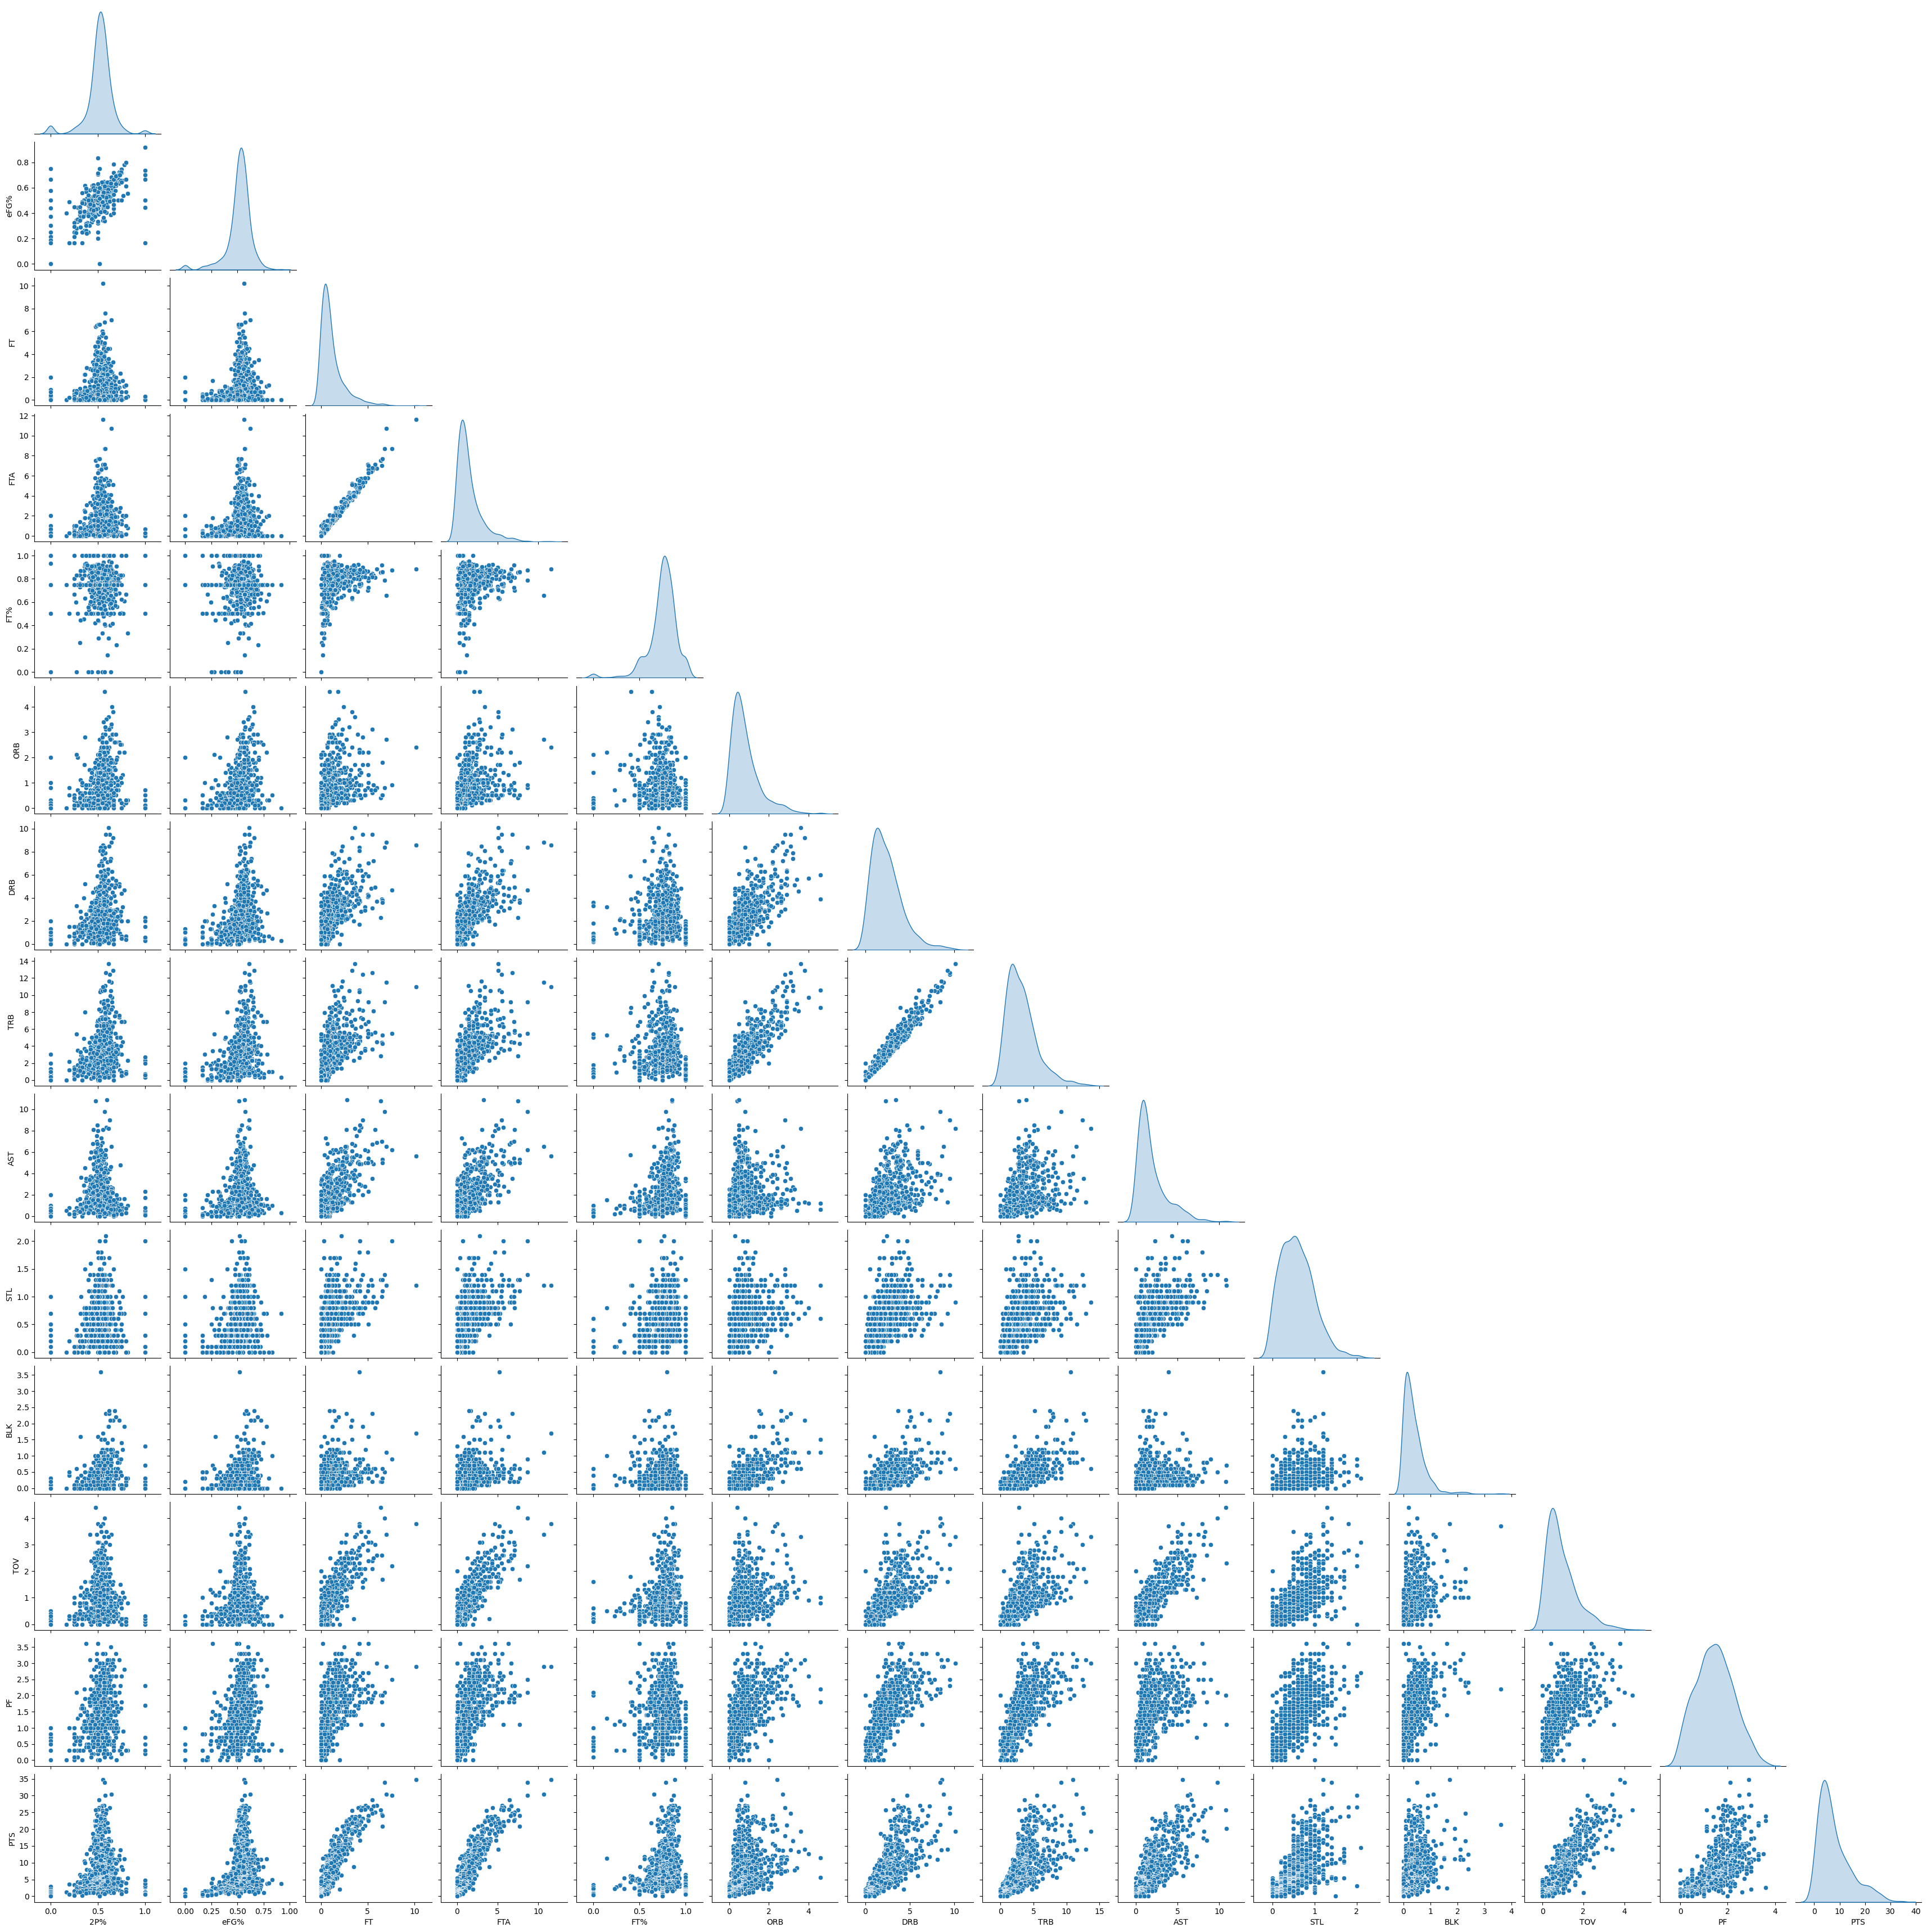

In [171]:
# VISUALING THE DISTRIBUTION OF THE REMAINING VARIABLES AND THEIR RELATIONSHIPS (CORRELATIONS)
sns.pairplot(nba_data[['2P%','eFG%','FT','FTA',
       'FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']], diag_kind='kde', corner=True)

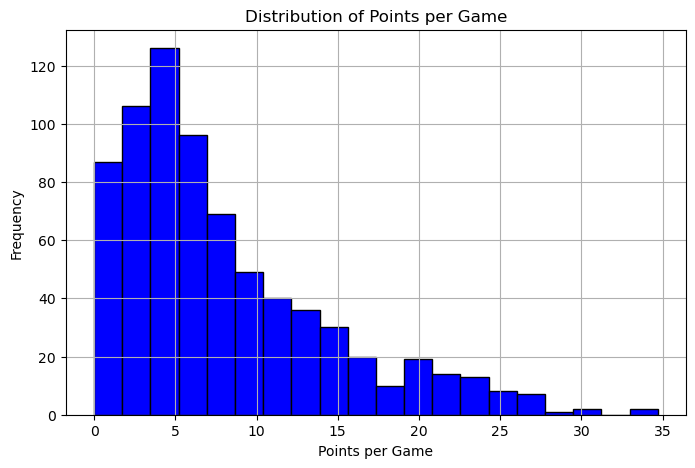

In [173]:
# ZOOMING TO SOME OF THE DISTRIBUTIONS (POINTS PER GAME)
# Step 6: Plot: Points per Game Distribution
plt.figure(figsize=(8, 5))
plt.hist(nba_data['PTS'], bins=20, color='blue', edgecolor='black')
plt.title("Distribution of Points per Game")
plt.xlabel("Points per Game")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

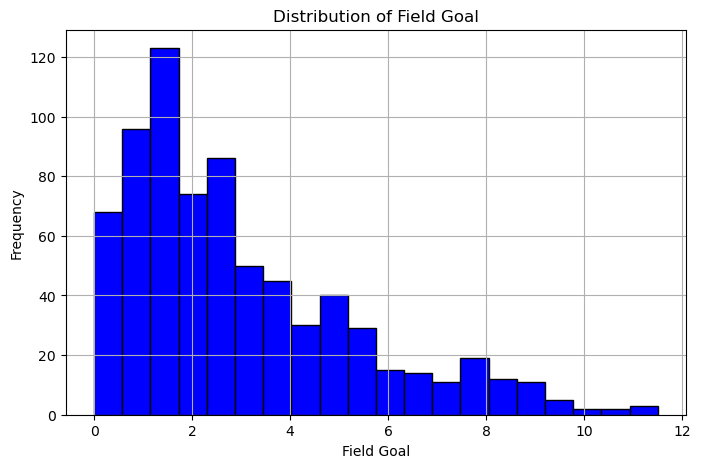

In [174]:
# VISUALIZING THE DISTRIBUTION OF FIELD GOAL
plt.figure(figsize=(8, 5))
plt.hist(nba_data['FG'], bins=20, color='blue', edgecolor='black')
plt.title("Distribution of Field Goal")
plt.xlabel("Field Goal")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

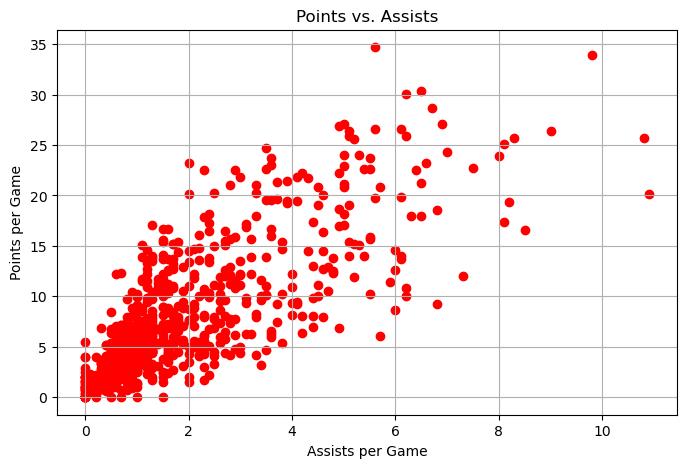

In [175]:
# VISUALIZING THE RELATIONSHIP BETWEEN ASSISTS AND POINTS
plt.figure(figsize=(8, 5))
plt.scatter(nba_data['AST'], nba_data['PTS'], color='red')
plt.title("Points vs. Assists")
plt.xlabel("Assists per Game")
plt.ylabel("Points per Game")
plt.grid(True)
plt.show()

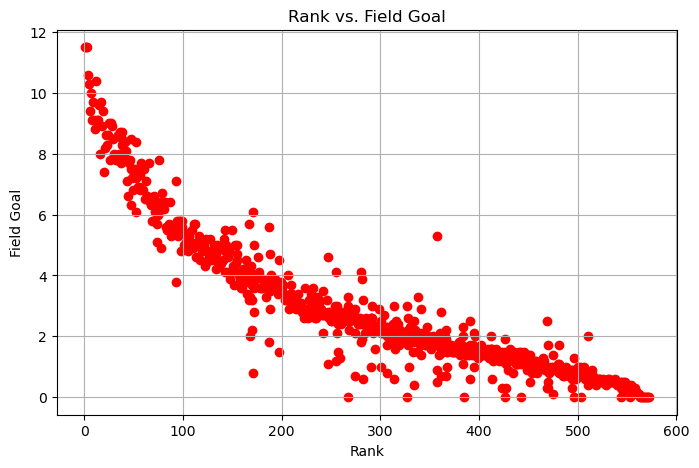

In [177]:
# VISUALING THE RELATIONSHIP BETWEEN RANK AND FIELD GOALS
plt.figure(figsize=(8, 5))
plt.scatter(nba_data['Rk'], nba_data['FG'], color='red')
plt.title("Rank vs. Field Goal")
plt.xlabel("Rank")
plt.ylabel("Field Goal")
plt.grid(True)
plt.show()

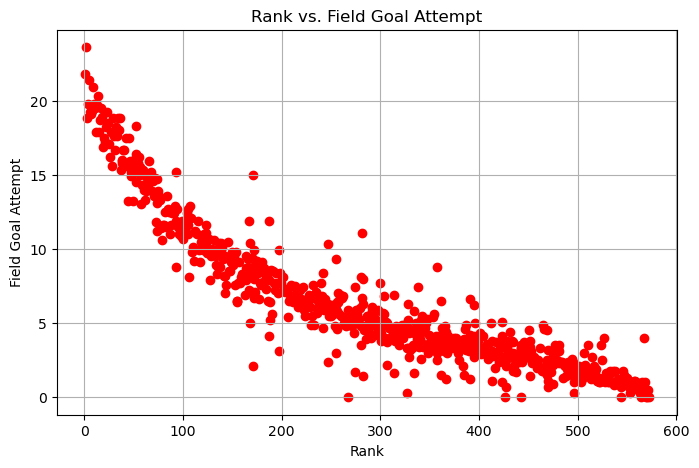

In [179]:
# VISUALIZING THE RELATIONSHIP BETWEEN RANK AND FIELD GOAL ATTEMPT
plt.figure(figsize=(8, 5))
plt.scatter(nba_data['Rk'], nba_data['FGA'], color='red')
plt.title("Rank vs. Field Goal Attempt")
plt.xlabel("Rank")
plt.ylabel("Field Goal Attempt")
plt.grid(True)
plt.show()